In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.datasets import make_blobs

In [ ]:
# 1. Generate synthetic data with clusters of varying densities

centers = [[1, 1], [-1, -1], [1, -1]]
cluster_std = [0.3, 0.2, 0.5]  # Different densities
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std = cluster_std, random_state = 42)

In [ ]:
# 2. Apply OPTICS clustering
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
optics_model.fit(X)

OPTICS(min_cluster_size=0.05, min_samples=10)

In [ ]:
# 3. Reachability and ordering
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]
space = np.arange(len(X))

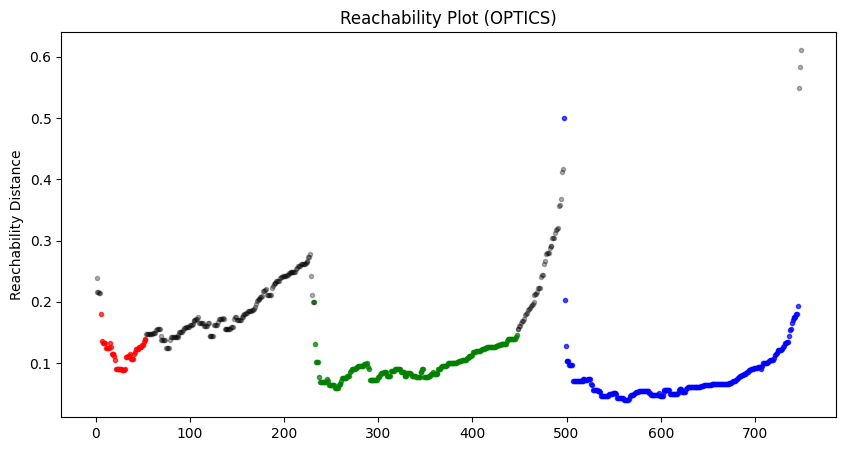

In [ ]:
# 4. Plot Reachability
plt.figure(figsize=(10, 5))
colors = ['r.', 'g.', 'b.', 'y.', 'c.']

for klass, color in zip(range(0, len(np.unique(labels))), colors):

    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.7)

plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)  # Noise
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot (OPTICS)')
plt.show()


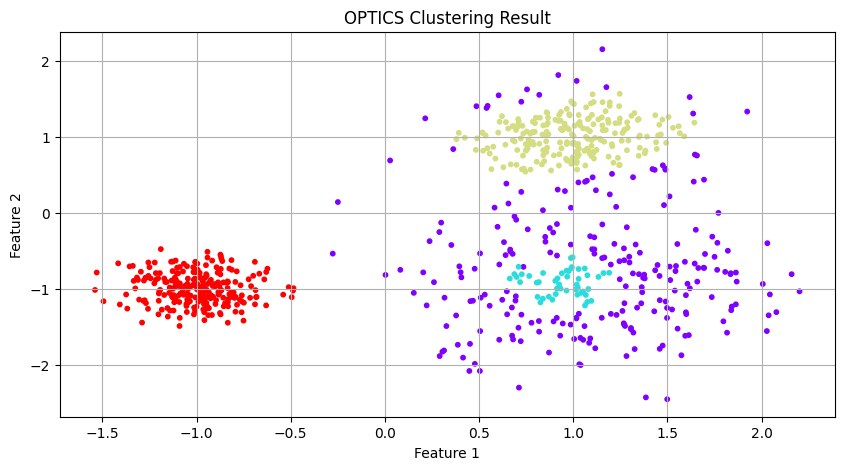

In [ ]:
# 5. Plot Clustering Result
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c = optics_model.labels_, cmap='rainbow', s=10)
plt.title('OPTICS Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()